In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#reads bejaia data set
bejaia_data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",  sep='\s*,\s*', usecols=['day','month','Temperature', 'RH', 'Ws','Rain' ,'FFMC','DMC','DC','ISI','BUI','FWI','Classes'], skiprows=[0], nrows=122, engine='python')
bejaia_data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [52]:
#reads sidi-bel data set
sidi_bel_data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", sep='\s*,\s*', usecols=['day','month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Classes'], skiprows=126, engine='python')
sidi_bel_data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


                                ALGORITMO DE NAIVE BAYES

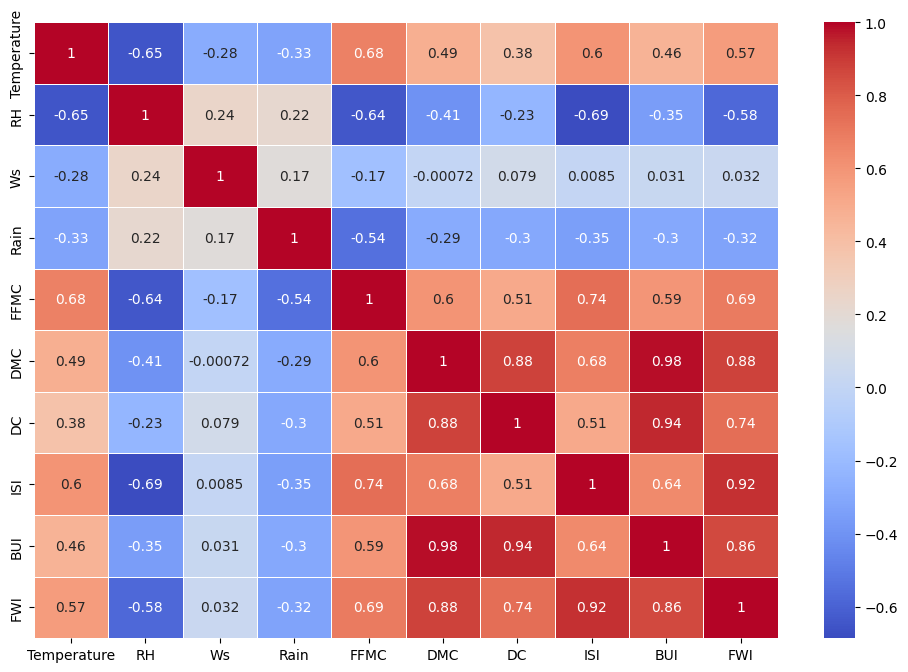

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset and skip rows with missing values
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", sep='\s*,\s*', skipinitialspace=True, skiprows=[0,124,125,126], engine='python')

# Convert numerical columns to float and replace missing values with NaN
numerical_columns = ["Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]
for column in numerical_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Convert the 'Classes' column to binary values
data['Classes'] = data['Classes'].replace(['not fire', 'fire'], [0, 1])

# Remove rows with missing values
data = data.dropna(subset=numerical_columns + ['Classes'])

# Calculate the correlation matrix
input_variables = ["Temperature", "RH", "Ws", "Rain"]
fwi_components = ["FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]
corr_matrix = data[input_variables + fwi_components].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

X = data[input_variables + fwi_components]  # Features
y = data['Classes']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# data preprocessing steps here...

# Remove rows with missing values
data = data.dropna(subset=input_variables + fwi_components + ['Classes'])

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the classifier to the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.92
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        22
         1.0       0.93      0.93      0.93        27

    accuracy                           0.92        49
   macro avg       0.92      0.92      0.92        49
weighted avg       0.92      0.92      0.92        49

[[20  2]
 [ 2 25]]


In [11]:

def evaluate_classifier(y_test, y_pred):
    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Print the classification report
    print(classification_report(y_test, y_pred))

    # Print the confusion matrix
    print(confusion_matrix(y_test, y_pred))


In [12]:
evaluate_classifier(y_test, y_pred)


Accuracy: 0.92
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        22
         1.0       0.93      0.93      0.93        27

    accuracy                           0.92        49
   macro avg       0.92      0.92      0.92        49
weighted avg       0.92      0.92      0.92        49

[[20  2]
 [ 2 25]]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier with adjusted var_smoothing
gnb = GaussianNB(var_smoothing=1e-1)

# Fit the classifier to the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Evaluate the classifier
evaluate_classifier(y_test, y_pred)

Accuracy: 0.80
              precision    recall  f1-score   support

         0.0       0.71      0.91      0.80        22
         1.0       0.90      0.70      0.79        27

    accuracy                           0.80        49
   macro avg       0.81      0.81      0.80        49
weighted avg       0.82      0.80      0.80        49

[[20  2]
 [ 8 19]]


////////////////////////////////////////////////////////////////////////

In [9]:
#reads full data set
total_data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", sep='\s*,\s*',skipinitialspace=True, usecols=['day','month','Temperature', 'RH', 'Ws','Rain' ,'FFMC','DMC','DC','ISI','BUI','FWI','Classes'], skiprows=[0,124,125,126], engine='python')
total_data.loc[total_data['Classes'].isna()].head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,7,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,None


We have a weird missing comma in the DC collumn in the middle of the file that I haven't been hable to figure out how to handle

Didn't include year as a collumn because it is all the same (2012), I think we can exclude day and month aswell

In [10]:
total_data.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000


For some reason DC and FWI do no appear in the describe() table

Some value/s of FFMC is/are greater than the suposed max of 92.5 being the actual max 96

Some value/S of DMC is/are lower than the suposed min of 1.1 being the actual min 0.7

Some value/s of ISI is/are greater than the suposed max of 18.5 being the actual max 19

In [57]:
total_data = total_data.loc[(total_data['FFMC'] < 92.5) & (total_data['DMC'] > 1.1) & (total_data['ISI'] < 18.5)]
total_data.dropna().describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,16.048673,7.460177,32.022124,63.115044,15.500000,0.732301,77.868584,14.459735,4.276991,16.603982
std,8.860014,1.115829,3.317890,13.275376,2.762044,1.908780,13.239773,12.354620,3.392043,14.354002
min,1.000000,6.000000,24.000000,33.000000,6.000000,0.000000,28.600000,1.200000,0.000000,1.700000
25%,8.000000,6.000000,30.000000,54.000000,14.000000,0.000000,72.375000,5.800000,1.400000,6.025000
50%,16.000000,7.000000,32.000000,64.000000,15.000000,0.000000,82.650000,11.150000,3.250000,11.850000
75%,24.000000,8.000000,35.000000,73.000000,17.000000,0.500000,87.775000,18.925000,6.800000,21.975000
max,31.000000,9.000000,40.000000,90.000000,29.000000,16.800000,92.200000,65.900000,14.300000,68.000000


17 rows are lost! Should we drop them? 

All of these deviations seem real so I think we shouldn't drop

In [51]:
total_data['Classes'].unique()
sb.pairplot(total_data.dropna(), hue='Classes')

Without dropping the 17 rows

<img src="total_data.png" />

After dropping them

<img src="total_data_drop.png" />